(512, 384, 3)
(512, 384, 3)
(512, 384, 3)
(512, 384, 3)
(512, 384, 3)
(512, 384, 3)


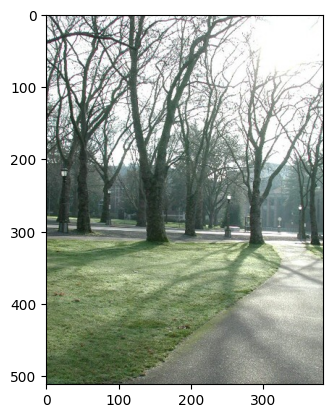

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path1 = 'parrington/prtn00.jpg'
path2 = 'parrington/prtn01.jpg'

img_path = ['parrington/prtn00.jpg', 'parrington/prtn01.jpg', 'parrington/prtn02.jpg']

# Load the images
image1 = cv2.imread(img_path[0])





for i in range(1, len(img_path)):
    image2 = cv2.imread(img_path[i])
    print(image1.shape)
    print(image2.shape)
    # Convert images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)    
    gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    # Initialize the feature detector and extractor (e.g., SIFT)
    orb = cv2.ORB_create(nfeatures = 50000)

    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Initialize the feature matcher using brute-force matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)

    # Match the descriptors using brute-force matching
    matches = bf.match(descriptors1, descriptors2)

    # Select the top N matches
    num_matches = 100000
    matches = sorted(matches, key=lambda x: x.distance)[:num_matches]

    # Extract matching keypoints
    src_points = np.float32([keypoints1[match.queryIdx].pt for match in matches]).reshape(-1, 1, 2)
    dst_points = np.float32([keypoints2[match.trainIdx].pt for match in matches]).reshape(-1, 1, 2)

    # Estimate the homography matrix
    homography, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)



    # Warp the first image using the homography
    result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))

    # Blending the warped image with the second image using alpha blending
    alpha = 0.001  # blending factor
    blended_image = cv2.addWeighted(result, alpha, image2, 1 - alpha, 0)
    print(blended_image.shape)
    image1 = blended_image
# Display the blended image
plt.imshow(blended_image)
plt.show()
# cv2.imshow('Blended Image', blended_image)
# cv2.waitKey(0)    
# cv2.destroyAllWindows()



Success


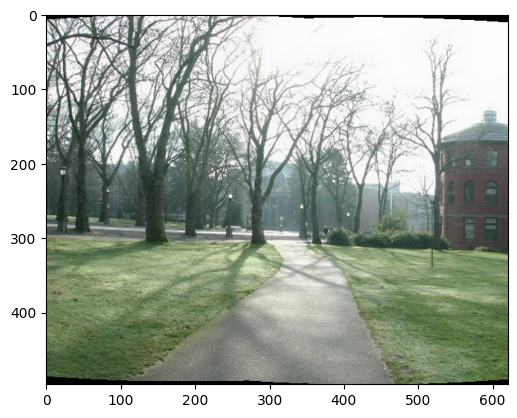

In [2]:
imgs = []
img_path = ['parrington/prtn00.jpg', 'parrington/prtn01.jpg', 'parrington/prtn02.jpg']


for i in range(len(img_path)):
    imgs.append(cv2.imread(img_path[i]))
    # imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4) 


stitching = cv2.Stitcher.create()
(dummy,output)=stitching.stitch(imgs) 

if dummy != cv2.STITCHER_OK:
    print("Not success")
    
else:
    print("Success")
    output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)






plt.imshow(output)
plt.show()
